# Installing libraries

In [1]:
%%capture
# Installing libraries without displaying output
!pip install scikit-learn
!pip install missingno
!pip install xgboost
!pip install imbalanced-learn
!pip install fancyimpute
!pip install tensorflow
!pip install tabulate
!pip install statsmodels
!pip install lightgbm

# Importing libraries

In [2]:
# Importing necessary libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import numpy as np
from sklearn.feature_selection import RFECV
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTENC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

import lightgbm as lgb
from lightgbm import LGBMClassifier

# Dataset preparation

## Loading data

In [3]:
# Anxiety ------------------------------------
# loading feature engineered variables
anx_data=pd.read_csv('df_anx_t6_2.csv')

seed = 42 

# Loading in data
X_anx = anx_data.iloc[:, :-1]
y_anx = anx_data.iloc[:, -1]


# Distressed ---------------------------------
# loading feature engineered variables
dis_data=pd.read_csv('data_2.csv')

seed = 42 

# Loading in data
X_dis = dis_data.iloc[:, :-1]
y_dis = dis_data.iloc[:, -1]

# Removing redundant features
X_dis = X_dis.drop(X_dis.columns[0], axis=1)


# Defining preprocessing functions

## General imputation and balancing methods

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.metrics import make_scorer, f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score

# Sampling methods
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Imputation methods
simple_impute = SimpleImputer(strategy='mean')
knn_impute = KNNImputer(n_neighbors=5)
ite_impute = IterativeImputer(random_state=42)
rf_impute = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42))

# Feature selection
model = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='f1')

# scaler
scaler = MinMaxScaler()

# Defining preprocessing methods and functions

## Preprocessing function

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2

############################### F1-score #########################################################################
def compute_f1_macro_scores(X, y, selected_features_per_fold_lists, intersecting_features, union_features):
    """
    Computes F1 macro scores for given feature sets using Stratified K-Fold cross-validation and a RandomForestClassifier.

    Parameters:
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.
    selected_features_per_fold_lists (list of lists): List containing lists of selected features for each fold.
    intersecting_features (set): Set of intersecting features across all folds.
    union_features (set): Set of union features across all folds.

    Returns:
    tuple: A tuple containing:
        - f1_scores (list): Mean F1 macro scores for each feature set.
        - std_scores (list): Standard deviation of F1 macro scores for each feature set.
        - best_feature_list (list): The list of features with the highest F1 macro score.

    This function performs the following steps:
    1. Initializes Stratified K-Fold cross-validation with 5 splits.
    2. Initializes a RandomForestClassifier.
    3. Computes F1 macro scores and their standard deviations for feature sets in selected_features_per_fold_lists.
    4. Computes F1 macro scores and their standard deviations for the intersecting features.
    5. Computes F1 macro scores and their standard deviations for the union features.
    6. Determines the best feature list based on the highest F1 macro score from the selected feature sets.
    """

    # Defining split and classifier
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = RandomForestClassifier(random_state=42)

    # Lists to store results
    f1_scores = []
    std_scores = []

    # F1 scores for selected features
    for features_list in selected_features_per_fold_lists:
        X_selected = X[features_list]
        f1 = cross_val_score(clf, X_selected, y, cv=skf, scoring='f1_macro')
        f1_scores.append(np.mean(f1))
        std_scores.append(np.std(f1))

    # F1 score for intersecting features
    X_intersecting = X[list(intersecting_features)]
    f1_intersecting = cross_val_score(clf, X_intersecting, y, cv=skf, scoring='f1_macro')
    f1_scores.append(np.mean(f1_intersecting))
    std_scores.append(np.std(f1_intersecting))

    # F1 score for union features
    X_union = X[list(union_features)]
    f1_union = cross_val_score(clf, X_union, y, cv=skf, scoring='f1_macro')
    f1_scores.append(np.mean(f1_union))
    std_scores.append(np.std(f1_union))

    # Select best feature list based on F1 score
    best_feature_list_index = np.argmax(f1_scores[:len(selected_features_per_fold_lists)])
    best_feature_list = selected_features_per_fold_lists[best_feature_list_index]

    return f1_scores, std_scores, best_feature_list


####################### MI ##################################################################################
def compute_mutual_info_with_cross_validation(X, y, num_features=10):
    """
    Computes mutual information scores and selects features using cross-validation.

    Parameters:
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.
    num_features (int): The number of top features to select based on mutual information scores.

    Returns:
    tuple: A tuple containing:
        - selected_features_lists (list of lists): List containing lists of selected features for each fold.
        - intersecting_features (list): List of features that are common across all folds.
        - union_features (list): List of features that appear in at least one fold.

    This function performs the following steps:
    1. Initializes Stratified K-Fold cross-validation with 5 splits.
    2. Initializes sets for all features, intersecting features, and union features.
    3. Iterates over each fold, extracting training indices.
    4. Computes mutual information scores for the training data in each fold.
    5. Sorts the features by their mutual information scores in descending order and selects the top features.
    6. Updates the selected features lists, intersecting features, and union features.
    7. Converts intersecting and union feature sets to lists and returns them along with the selected features lists.
    """

    # Defining split
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # List to store selected feature lists
    selected_features_lists = []

    # Initializing sets
    all_features = set(X.columns)
    intersecting_features = all_features.copy()
    union_features = set()

    # For each fold select top features
    for train_index, _ in skf.split(X, y):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        mi = mutual_info_classif(X_train, y_train)
        sorted_features = sorted(list(zip(X_train.columns, mi)), key=lambda x: x[1], reverse=True)[:num_features]
        features_set = set(feature for feature, _ in sorted_features)
        selected_features_lists.append(list(features_set))
        intersecting_features.intersection_update(features_set)
        union_features.update(features_set)

    return selected_features_lists, list(intersecting_features), list(union_features)

########################## Chi-square ###########################################################################
def compute_chi2_feature_subsets_with_cross_validation(X, y, num_features=10):
    """
    Computes Chi-squared scores and selects features using cross-validation.

    Parameters:
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.
    num_features (int): The number of top features to select based on Chi-squared scores.

    Returns:
    tuple: A tuple containing:
        - selected_features_lists (list of lists): List containing lists of selected features for each fold.
        - intersecting_features (list): List of features that are common across all folds.
        - union_features (list): List of features that appear in at least one fold.

    This function performs the following steps:
    1. Initializes Stratified K-Fold cross-validation with 5 splits.
    2. Initializes sets for all features, intersecting features, and union features.
    3. Iterates over each fold, extracting training indices.
    4. Uses SelectKBest to select the top num_features features based on Chi-squared scores.
    5. Updates the selected features lists, intersecting features, and union features.
    6. Converts intersecting and union feature sets to lists and returns them along with the selected features lists.
    """
    # Defining split
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # List to store seleected feature lists
    selected_features_lists = []

    # Initializing sets
    all_features = set(X.columns)
    intersecting_features = all_features.copy()
    union_features = set()

    # For each fold select top n-features based on chi-squared scores
    for train_index, _ in skf.split(X, y):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        chi2_selector = SelectKBest(chi2, k=num_features)
        X_kbest = chi2_selector.fit_transform(X_train, y_train)
        selected_features = X.columns[chi2_selector.get_support()].tolist()
        selected_features_lists.append(selected_features)
        features_set = set(selected_features)
        intersecting_features.intersection_update(features_set)
        union_features.update(features_set)

    return selected_features_lists, list(intersecting_features), list(union_features)

##################### Fischer ##############################################################################################
def calculate_fisher_scores(dataframe, target):
    """
    Calculates Fisher scores for each feature in the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The input feature matrix.
    target (pd.Series): The target labels.

    Returns:
    dict: A dictionary with features as keys and their Fisher scores as values.

    This function performs the following steps:
    1. Initializes an empty dictionary to store Fisher scores.
    2. Iterates over each feature in the dataframe.
    3. Computes the overall mean of the feature.
    4. Computes the number of samples, mean, and variance for each class.
    5. Calculates the inter-class variance.
    6. Calculates the intra-class variance.
    7. Computes the Fisher score for the feature and stores it in the dictionary.
    """
    # Initializing dictionary for feature 
    fisher_scores = {}

    # For each feature in dataframe calculate Fisher-score
    for column in dataframe.columns:
        mu = np.mean(dataframe[column])

        n_1 = np.sum(target == 0)
        mu_1 = np.mean(dataframe[column][target == 0])
        var_1 = np.var(dataframe[column][target == 0])

        n_2 = np.sum(target == 1)
        mu_2 = np.mean(dataframe[column][target == 1])
        var_2 = np.var(dataframe[column][target == 1])

        inter_class = n_1 * (mu_1 - mu)**2 + n_2 * (mu_2 - mu)**2
        intra_class = (n_1 - 1) * var_1 + (n_2 - 1) * var_2

        fisher_scores[column] = inter_class / intra_class
    
    return fisher_scores

def compute_fischer_feature_subsets_with_cross_validation(dataframe, target, num_features, n_splits=5):
    """
    Computes Fisher scores and selects features using cross-validation.

    Parameters:
    dataframe (pd.DataFrame): The input feature matrix.
    target (pd.Series): The target labels.
    num_features (int): The number of top features to select based on Fisher scores.
    n_splits (int): The number of splits for Stratified K-Fold cross-validation.

    Returns:
    tuple: A tuple containing:
        - selected_features_per_fold_lists (list of lists): List containing lists of selected features for each fold.
        - intersecting_features (list): List of features that are common across all folds.
        - union_features (list): List of features that appear in at least one fold.

    This function performs the following steps:
    1. Initializes Stratified K-Fold cross-validation with the specified number of splits.
    2. Initializes lists to store selected features for each fold.
    3. Iterates over each fold, extracting training indices.
    4. Computes Fisher scores for the training data in each fold.
    5. Sorts the features by their Fisher scores in descending order and selects the top features.
    6. Updates the lists of selected features for each fold.
    7. Determines the intersecting and union features across all folds.
    8. Converts intersecting and union feature sets to lists and returns them along with the selected features lists.
    """
    # Defining split
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initializing lists for storing selected features
    selected_features_per_fold_sets = []
    selected_features_per_fold_lists = []

    # For each fold, calculate fisher scores and add best n-features
    for train_index, _ in skf.split(dataframe, target):
        X_train, y_train = dataframe.iloc[train_index], target.iloc[train_index]
        fisher_scores = calculate_fisher_scores(X_train, y_train)

        top_features = sorted(fisher_scores, key=fisher_scores.get, reverse=True)[:num_features]
        selected_features_per_fold_sets.append(set(top_features))
        selected_features_per_fold_lists.append(list(top_features))

    intersecting_features = set.intersection(*selected_features_per_fold_sets)
    union_features = set.union(*selected_features_per_fold_sets)

    return selected_features_per_fold_lists, list(intersecting_features), list(union_features)

################################## greedy search ###########################################################
def forward_greedy_search(X, y, model, scoring_metric):
    """
    Performs forward greedy feature selection using cross-validation.

    Parameters:
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.
    model (estimator object): The machine learning model to be used for evaluation.
    scoring_metric (str or callable): The scoring metric to evaluate feature subsets.

    Returns:
    tuple: A tuple containing:
        - selected_features (list): List of selected features in the order they were added.
        - best_score (float): The best cross-validation score achieved with the selected features.

    This function performs the following steps:
    1. Initializes the number of features, an empty list for selected features, and a variable for the best score.
    2. Initializes Stratified K-Fold cross-validation with 5 splits.
    3. Iteratively adds features to the selected features list by:
        a. Checking each feature not already selected.
        b. Evaluating the performance of the model with the current candidate feature set using cross-validation.
        c. Selecting the feature that gives the highest mean cross-validation score.
    4. Stops the selection process if no feature improves the score.
    5. Returns the list of selected features and the best score.
    """
    
    num_features = X.shape[1]
    selected_features = []
    best_score = 0
    
    # Defining split
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    while len(selected_features) < num_features:
        best_feature = None
        for feature in X.columns:
            if feature not in selected_features:
                candidate_features = selected_features + [feature]
                X_subset = X[candidate_features]
                scores = cross_val_score(model, X_subset, y, cv=cv, scoring=scoring_metric)
                mean_score = scores.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_feature = feature
        if best_feature:
            selected_features.append(best_feature)
        else:
            break

    return selected_features, best_score

################################### RFECV ##################################################################
def perform_RFECV(X, y, model, scoring_metric):
    """
    Performs Recursive Feature Elimination with Cross-Validation (RFECV) to select features.

    Parameters:
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.
    model (estimator object): The machine learning model to be used for evaluation.
    scoring_metric (str): The scoring metric to evaluate feature subsets.

    Returns:
    pd.Index: An index of the selected features.

    This function performs the following steps:
    1. Defines Stratified K-Fold cross-validation with 5 splits.
    2. Initializes the RFECV object with the specified model, cross-validation method, and scoring metric.
    3. Fits the RFECV object to the input data.
    4. Retrieves the selected features based on the RFECV fitting.
    5. Returns the index of the selected features.
    """
    # Defining the cross-validation method
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Initializing RFECV
    rfe = RFECV(estimator=model, cv=cv, scoring='f1_macro')
    
    # Fitting RFECV to the data
    rfe.fit(X, y)
    
    # Getting the selected features and their rankings
    selected_features_rfecv = X.columns[rfe.support_]

    return selected_features_rfecv


#################################### Feature Selection Ensemble ##############################################

def feature_selection_ensemble(X, y, num_features, n_splits=5, scoring_metric="f1_macro"):
    """
    Performs ensemble feature selection using multiple filter and wrapper methods.

    Parameters:
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.
    num_features (int): The number of top features to select based on different methods.
    n_splits (int): The number of splits for Stratified K-Fold cross-validation.
    scoring_metric (str): The scoring metric to evaluate feature subsets.

    Returns:
    tuple: A tuple containing:
        - baseline (Index): The original feature set.
        - heterogeneous_intersection_features (list): Features common across all selection methods.
        - heterogeneous_union_features (list): Features appearing in at least one selection method.
        - homogeneous_intersection_features (list): Features common across all filter methods.
        - homogeneous_union_features (list): Features appearing in at least one filter method.
        - best_feature_list_fs (list): Best feature list based on Fisher scores.
        - best_feature_list_chi (list): Best feature list based on Chi-squared scores.
        - best_feature_list_mi (list): Best feature list based on Mutual Information scores.
        - selected_features_rfecv (Index): Selected features from RFECV.
        - selected_features_greedy (list): Selected features from forward greedy search.

    This function performs the following steps:
    1. Initializes the random forest model and stores the baseline feature set.
    2. Performs feature selection using filter methods: Mutual Information, Chi-squared, and Fisher scores.
    3. Performs feature selection using wrapper methods: forward greedy search and RFECV.
    4. Identifies the best feature subsets for each filter method based on F1 macro scores.
    5. Creates a homogeneous aggregation layer for filter methods by finding intersection and union of best features.
    6. Creates a heterogeneous aggregation layer by combining filter and wrapper methods.
    7. Returns the baseline and aggregated feature sets along with the individual best feature lists.
    """
    # Defining constants
    model = RandomForestClassifier(random_state=42)

    # Adding baseline dataset
    baseline = X.columns

    # Performing feature selection - filter methods
    feature_subsets_mi, intersecting_features_mi, union_features_mi = compute_mutual_info_with_cross_validation(X, y, num_features=num_features)
    feature_subsets_chi, intersecting_features_chi, union_features_chi = compute_chi2_feature_subsets_with_cross_validation(X, y, num_features=num_features)
    feature_subsets_fs, intersecting_features_fs, union_features_fs = compute_fischer_feature_subsets_with_cross_validation(X, y, num_features=num_features)

    # Performing feature selection - wrapper methods
    selected_features_greedy, best_score_greedy = forward_greedy_search(X, y, model, scoring_metric = scoring_metric)
    selected_features_rfecv = perform_RFECV(X, y, model=model, scoring_metric = scoring_metric)

    # Finding best features in filtermethods
    f1_scores_mi, std_scores_mi, best_feature_list_mi = compute_f1_macro_scores(X, y, feature_subsets_mi, intersecting_features_mi, union_features_mi)
    f1_scores_chi, std_scores_chi, best_feature_list_chi = compute_f1_macro_scores(X, y, feature_subsets_chi, intersecting_features_chi, union_features_chi)
    f1_scores_fs, std_scores_fs, best_feature_list_fs = compute_f1_macro_scores(X, y, feature_subsets_fs, intersecting_features_fs, union_features_fs)

    # Creating homogeneous aggregation layer for filter-methods
    homogeneous_intersection_features = list(set(best_feature_list_mi).intersection(best_feature_list_chi).intersection(best_feature_list_fs))
    homogeneous_union_features = list(set(best_feature_list_mi).union(best_feature_list_chi).union(best_feature_list_fs))

    # Creating heterogeneous aggregation layer
    heterogeneous_intersection_features = list(set(homogeneous_intersection_features).intersection(selected_features_greedy).intersection(selected_features_rfecv))
    heterogeneous_union_features = list(set(homogeneous_union_features).union(selected_features_greedy).union(selected_features_rfecv))

    return baseline, heterogeneous_intersection_features, heterogeneous_union_features, homogeneous_intersection_features, homogeneous_union_features, best_feature_list_fs, best_feature_list_chi, best_feature_list_mi, selected_features_rfecv, selected_features_greedy


def create_pipeline_impute_select_balance(model, imputer, balancing_method, X, y):
    """
    Creates and evaluates machine learning pipelines with imputation, feature selection, and balancing.

    Parameters:
    model (estimator object): The machine learning model to be used for evaluation.
    imputer (imputer object): The imputer method to handle missing data.
    balancing_method (balancer object): The method to handle class imbalance.
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.

    Returns:
    tuple: A tuple containing:
        - results (list): A list of tuples with feature set names, selected features, mean F1 scores, and standard deviations.
        - methods (list): A list of methods used in preprocessing (imputer and balancing method).

    This function performs the following steps:
    1. Stores information about the imputer and balancing methods.
    2. Imputes missing data in the feature matrix.
    3. Scales the imputed data using MinMaxScaler.
    4. Performs feature selection using an ensemble of methods.
    5. Iterates over different feature subsets and evaluates them using a pipeline.
    6. Uses Stratified K-Fold cross-validation to evaluate the pipeline.
    7. Returns the evaluation results and preprocessing methods used.
    """
    # Store information of the methods used in preprocessing
    methods = [imputer, balancing_method]

    # Imputing data
    X_imputed = imputer.fit_transform(X)

    # Defining scaling method
    scaler = MinMaxScaler()

    # Fiting the scaler to data and transform it
    X_scaled = scaler.fit_transform(X_imputed)

    # Imputing data
    X_imputed = pd.DataFrame(data=X_scaled, columns = X.columns)

    num_features = 10 # top 25% features

    # Calling feature selection function
    baseline, heterogeneous_intersection_features, heterogeneous_union_features, homogeneous_intersection_features, homogeneous_union_features, best_feature_list_fs, best_feature_list_chi, best_feature_list_mi, selected_features_rfecv, selected_features_greedy = feature_selection_ensemble(X_imputed, y, num_features, n_splits=5, scoring_metric="f1_macro")

    # Storing feature subsets into list
    feature_list = [baseline, heterogeneous_intersection_features, heterogeneous_union_features, homogeneous_intersection_features, homogeneous_union_features, best_feature_list_fs, best_feature_list_chi, best_feature_list_mi, selected_features_rfecv, selected_features_greedy]
    # Storing name of each feature subset into list
    name_list = ['baseline', 'heterogeneous_intersection_features', 'heterogeneous_union_features', 'homogeneous_intersection_features', 'homogeneous_union_features', 'best_feature_list_fs', 'best_feature_list_chi', 'best_feature_list_mi', 'selected_features_rfecv', 'selected_features_greedy']
    # Creating list for storing output results
    results = []

    # For each feature subset - Calculate F1 macro score and standard deviation
    for feature_subset, feature_name in zip(feature_list, name_list):
        X_selected = X_imputed[feature_subset]

        # Defining pipeline to avoid data leakage
        pipeline = Pipeline(steps=[
        ('smote', balancing_method),
        ('classifier', model) 
        ])
        
        # Defining the stratified k-fold cross-validation
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Performing cross-validation - evaluation folds untouched by balancing methods
        scores = cross_val_score(pipeline, X_selected, y, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
        std = np.std(scores)  # Calculate standard deviation
        scores = np.mean(scores)

        results.append((feature_name, feature_subset, scores, std))

    print("Done !")
    return results, methods


def print_results(results, methods):
    """
    Prints the results of the preprocessing and feature selection pipeline evaluation.

    Parameters:
    results (list): A list of tuples with feature set names, selected features, mean F1 scores, and standard deviations.
    methods (list): A list of methods used in preprocessing (imputer and balancing method).

    This function performs the following steps:
    1. Prints the methods used in the preprocessing pipeline.
    2. Iterates over the results and prints the feature set name, mean F1 macro score, and standard deviation.
    3. Formats the output for readability.

    Returns:
    None
    """
    print("Results for preprocessing pipeline: ")
    print("    -", methods, "\n")
    for item in results:
        print(f"{item[0]:<40} F1_macro: {item[2]:<10} \t Standard deviation: {item[3]:<10}")
        print("-" * 100)


# RF

## Anxiety

In [ ]:
# Defining default rf-model
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

# Adding results to lists
results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

# Printing out results
for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distress

In [7]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results_dis = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods_dis = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results_dis, methods_dis):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results_dis for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7971131627732578 	 Standard deviation: 0.040781195831419516
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6687515288368472 	 Standard deviation: 0.07220315219272445
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8017800912212107 	 Standard deviation: 0.030676287026718152
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7097251456925721 	 Standard deviation: 0.04930752931192475
----------------------------------------------------------------------------------------------------
homogeneous_uni

NameError: name 'results' is not defined

# SVM

## Anxiety

In [ ]:
model = SVC(random_state=42)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")


## Distressed

In [10]:
model = SVC(random_state=42)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results_dis for result in sublist] 

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")


starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7879646028230574 	 Standard deviation: 0.051109960533740166
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.7033184546059517 	 Standard deviation: 0.06578257859027602
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8160834834237173 	 Standard deviation: 0.040757954725070565
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7590577582549614 	 Standard deviation: 0.07137383962222435
----------------------------------------------------------------------------------------------------
homogeneous_union_features             

# KNN

## Anxiety

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distressed

In [11]:
model = KNeighborsClassifier(n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results_dis for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.74784262526062 	 Standard deviation: 0.0472292708254748
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.589627185495849 	 Standard deviation: 0.16248290027007753
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.7638685068593468 	 Standard deviation: 0.06042487229676751
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7074810924682206 	 Standard deviation: 0.05866323888783237
----------------------------------------------------------------------------------------------------
homogeneous_union_fea

# MLP

## Anxiety

In [ ]:
model = MLPClassifier(random_state=42)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")


## Distressed

In [12]:
model = MLPClassifier(random_state=42)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for results in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")


starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7821206676632219 	 Standard deviation: 0.051040948720944355
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6790129474339193 	 Standard deviation: 0.04967224130767399
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.7999267077077972 	 Standard deviation: 0.06602048242783304
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7162148061732128 	 Standard deviation: 0.06772700309665958
----------------------------------------------------------------------------------------------------
homogeneous_unio

NameError: name 'result' is not defined

# XGB

## Anxiety

In [ ]:
model =  xgb.XGBClassifier(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distressed

In [13]:
model =  xgb.XGBClassifier(random_state=42, n_jobs=-1)

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for results in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")
#print(f"Method Details: {methods[results.index(best_result)]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7725175524761323 	 Standard deviation: 0.06277366443642009
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6687515288368472 	 Standard deviation: 0.07220315219272445
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.787748981793529 	 Standard deviation: 0.062132827055026464
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.6927082244331277 	 Standard deviation: 0.07412437660785914
----------------------------------------------------------------------------------------------------
homogeneous_union_features               

NameError: name 'result' is not defined

In [14]:
#for r, m in zip(results, methods):
#    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")
#print(f"Method Details: {methods[results.index(best_result)]}")

Best F1 Macro Score: 0.8727787548694967
Method: best_feature_list_fs
Feature Subset: ['eq5d5l_index_t6', 'MCS_t6', 'eq5d5l_vas2_den_dan_t6', 'ucla_t6_sum', 'summary_score_kccq_t6', 'eq5d5l_index_baseline', 'anxiety_base_score', 'PCS_t6', 'depression_base_score', 'icdc_t6_sum']


# NB

## Anxiety

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distressed

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for results in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7425722316029711 	 Standard deviation: 0.0459097880391629
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6991181830366692 	 Standard deviation: 0.06869378279427825
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.770977323208259 	 Standard deviation: 0.027085854777551262
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7090842301326304 	 Standard deviation: 0.09398139881719977
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F

NameError: name 'result' is not defined

# LGBM

## Anxiety

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distressed

In [20]:
model = LGBMClassifier(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for results in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7664993010329397 	 Standard deviation: 0.04353069494184135
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6486462932340972 	 Standard deviation: 0.041722098151899374
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.7800861886207244 	 Standard deviation: 0.033125445255354914
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.6808292919754045 	 Standard deviation: 0.07836388626001814
----------------------------------------------------------------------------------------------------
homogeneous_uni

NameError: name 'result' is not defined

# DCT

## Anxiety

In [ ]:
model = DecisionTreeClassifier(random_state=42)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distressed

In [23]:
model = DecisionTreeClassifier(random_state=42)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for results in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7025682285286918 	 Standard deviation: 0.059076788951433284
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6712310998280179 	 Standard deviation: 0.0972735018851557
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.7545312895031273 	 Standard deviation: 0.02209281788393771
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.6528134067430825 	 Standard deviation: 0.048393315721574126
----------------------------------------------------------------------------------------------------
homogeneous_union_features              

NameError: name 'result' is not defined

# LGR

## Anxiety

In [ ]:
model = LogisticRegression(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1, methods_1 = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_anx, y_anx)

# constant (knn imputer) - variation (sampling methods)
results_5, methods_5 = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_anx, y_anx)
results_6, methods_6 = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_anx, y_anx)
results_7, methods_7 = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_anx, y_anx)
results_8, methods_8 = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_anx, y_anx)

# constant (iterative imputer) - variation (sampling methods)
results_9, methods_9 = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_anx, y_anx)
results_10, methods_10 = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_anx, y_anx)
results_11, methods_11 = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_anx, y_anx)
results_12, methods_12 = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_anx, y_anx)

# constant (randomforest imputer) - variation (sampling methods)
results_13, methods_13 = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_anx, y_anx)
results_14, methods_14 = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_anx, y_anx)
results_15, methods_15 = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_anx, y_anx)
results_16, methods_16 = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10, results_11, results_12, results_13, results_14, results_15, results_16]
methods = [methods_1, methods_2, methods_3, methods_4, methods_5, methods_6, methods_7, methods_8, methods_9, methods_10, methods_11, methods_12, methods_13, methods_14, methods_15, methods_16]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for result in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])
    
# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

## Distressed

In [24]:
model = LogisticRegression(random_state=42, n_jobs=-1)

# Iterating through all imputers and samplers

# constant (simple imputer) - variation (sampling methods)
results_1_dis, methods_1_dis = create_pipeline_impute_select_balance(model, simple_impute, under_sampler, X_dis, y_dis)
results_2_dis, methods_2_dis = create_pipeline_impute_select_balance(model, simple_impute, over_sampler, X_dis, y_dis)
results_3_dis, methods_3_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_enn, X_dis, y_dis)
results_4_dis, methods_4_dis = create_pipeline_impute_select_balance(model, simple_impute, smote_tomek, X_dis, y_dis)

# constant (knn imputer) - variation (sampling methods)
results_5_dis, methods_5_dis = create_pipeline_impute_select_balance(model, knn_impute, under_sampler, X_dis, y_dis)
results_6_dis, methods_6_dis = create_pipeline_impute_select_balance(model, knn_impute, over_sampler, X_dis, y_dis)
results_7_dis, methods_7_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_enn, X_dis, y_dis)
results_8_dis, methods_8_dis = create_pipeline_impute_select_balance(model, knn_impute, smote_tomek, X_dis, y_dis)

# constant (iterative imputer) - variation (sampling methods)
results_9_dis, methods_9_dis = create_pipeline_impute_select_balance(model, ite_impute, under_sampler, X_dis, y_dis)
results_10_dis, methods_10_dis = create_pipeline_impute_select_balance(model, ite_impute, over_sampler, X_dis, y_dis)
results_11_dis, methods_11_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_enn, X_dis, y_dis)
results_12_dis, methods_12_dis = create_pipeline_impute_select_balance(model, ite_impute, smote_tomek, X_dis, y_dis)

# constant (randomforest imputer) - variation (sampling methods)
results_13_dis, methods_13_dis = create_pipeline_impute_select_balance(model, rf_impute, under_sampler, X_dis, y_dis)
results_14_dis, methods_14_dis = create_pipeline_impute_select_balance(model, rf_impute, over_sampler, X_dis, y_dis)
results_15_dis, methods_15_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_enn, X_dis, y_dis)
results_16_dis, methods_16_dis = create_pipeline_impute_select_balance(model, rf_impute, smote_tomek, X_dis, y_dis)

results = [results_1_dis, results_2_dis, results_3_dis, results_4_dis, results_5_dis, results_6_dis, results_7_dis, results_8_dis, results_9_dis, results_10_dis, results_11_dis, results_12_dis, results_13_dis, results_14_dis, results_15_dis, results_16_dis]
methods = [methods_1_dis, methods_2_dis, methods_3_dis, methods_4_dis, methods_5_dis, methods_6_dis, methods_7_dis, methods_8_dis, methods_9_dis, methods_10_dis, methods_11_dis, methods_12_dis, methods_13_dis, methods_14_dis, methods_15_dis, methods_16_dis]

for r, m in zip(results, methods):
    print_results(r, m)

# Flatten the list of results
all_results = [result for sublist in results for results in sublist]

# Find the result with the highest F1 macro score
best_result = max(all_results, key=lambda x: x[2])

# Print the best result
print(f"Best F1 Macro Score: {best_result[2]}")
print(f"Method: {best_result[0]}")
print(f"Feature Subset: {best_result[1]}")

starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...
feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!
Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
starting feature selection...


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


feature selection done!


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer(), RandomUnderSampler(random_state=42)] 

baseline                                 F1_macro: 0.7946953122864852 	 Standard deviation: 0.05961261361114714
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6790129474339193 	 Standard deviation: 0.04967224130767399
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8144058945817326 	 Standard deviation: 0.060944955146009186
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7508319652534265 	 Standard deviation: 0.0711919944063258
----------------------------------------------------------------------------------------------------
homogeneous_union_features               

NameError: name 'result' is not defined

# Defining preprocessing function without balancing

This function is important for calculating f1-macro scores for pipelines without sampling - this was also where the best results was found

In [8]:
def create_pipeline_impute_select_balance_nobalancing(model, imputer, X, y):
    """
    Creates and evaluates machine learning pipelines with imputation and feature selection, without balancing.

    Parameters:
    model (estimator object): The machine learning model to be used for evaluation.
    imputer (imputer object): The imputer method to handle missing data.
    X (pd.DataFrame): The input feature matrix.
    y (pd.Series or np.ndarray): The target labels.

    Returns:
    tuple: A tuple containing:
        - results (list): A list of tuples with feature set names, selected features, mean F1 scores, and standard deviations.
        - methods (list): A list of methods used in preprocessing (imputer).

    This function performs the following steps:
    1. Stores information about the imputer method.
    2. Imputes missing data in the feature matrix.
    3. Scales the imputed data using MinMaxScaler.
    4. Performs feature selection using an ensemble of methods.
    5. Iterates over different feature subsets and evaluates them using a pipeline.
    6. Uses Stratified K-Fold cross-validation to evaluate the pipeline.
    7. Returns the evaluation results and preprocessing methods used.
    """
    
    # Storing information of the methods used in preprocessing
    methods = [imputer]

    # Preparing data and methods
    X_test = X # initializing X as a new variable to avoid overwriting original variable

    X_imputed = imputer.fit_transform(X_test)
    
    scaler = MinMaxScaler() # The type of scaling is held constant throughout the iterations

    X_scaled = scaler.fit_transform(X_imputed)

    X_test = pd.DataFrame(data=X_scaled, columns = X_test.columns)
    
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    num_features = 10 # top 25% features
    baseline, heterogeneous_intersection_features, heterogeneous_union_features, homogeneous_intersection_features, homogeneous_union_features, best_feature_list_fs, best_feature_list_chi, best_feature_list_mi, selected_features_rfecv, selected_features_greedy = feature_selection_ensemble(X_test, y, num_features, n_splits=5, scoring_metric="f1_macro")

    
    preprocessing_pipeline = make_pipeline(
        scaler,
        imputer,
        model
    )
    
    feature_list = [baseline, heterogeneous_intersection_features, heterogeneous_union_features, homogeneous_intersection_features, homogeneous_union_features, best_feature_list_fs, best_feature_list_chi, best_feature_list_mi, selected_features_rfecv, selected_features_greedy]
    name_list = ['baseline', 'heterogeneous_intersection_features', 'heterogeneous_union_features', 'homogeneous_intersection_features', 'homogeneous_union_features', 'best_feature_list_fs', 'best_feature_list_chi', 'best_feature_list_mi', 'selected_features_rfecv', 'selected_features_greedy']
    results = []
    
    for feature_subset, feature_name in zip(feature_list, name_list): # Calculating f1-macro CV score for each feature subset
        X_selected = X_test[feature_subset]

        # Performing cross-validation - evaluation folds untouched by balancing methods
        scores = cross_val_score(preprocessing_pipeline, X_selected, y, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
        std = np.std(scores)  # Calculate standard deviation
        scores = np.mean(scores)

        results.append((feature_name, feature_subset, scores, std))

    print("Done !")
    return results, methods


def print_results(results, methods):
    """
    Prints the results of the preprocessing and feature selection pipeline evaluation.

    Parameters:
    results (list): A list of tuples with feature set names, selected features, mean F1 scores, and standard deviations.
    methods (list): A list of methods used in preprocessing (imputer and balancing method).

    This function performs the following steps:
    1. Prints the methods used in the preprocessing pipeline.
    2. Iterates over the results and prints the feature set name, mean F1 macro score, and standard deviation.
    3. Formats the output for readability.

    Returns:
    None
    """
    print("Results for preprocessing pipeline: ")
    print("    -", methods, "\n")
    for item in results:
        print(f"{item[0]:<40} F1_macro: {item[2]:<10} \t Standard deviation: {item[3]:<10}")
        print("-" * 100)

## RF

### Anxiety

In [130]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !


In [132]:
# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.8212531438026052 	 Standard deviation: 0.05834885331388393
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.8040989168782865 	 Standard deviation: 0.05625200832213487
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8197501657184627 	 Standard deviation: 0.07457043978460015
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.838085400047612 	 Standard deviation: 0.05213028864735541
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.85460599012346 	 Standard deviati

### Distressed

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## SVM

### Anxiety

In [134]:
model = SVC(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.8187942088812956 	 Standard deviation: 0.06304979320061012
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.7505740519127435 	 Standard deviation: 0.08313764546486442
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8272827452226108 	 Standard deviation: 0.04858098142070065
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.828010598350373 	 Standard deviation: 0.07179468466807729
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.8272827452226108 	 Standar

### Distressed

In [ ]:
model = SVC(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## KNN

### Anxiety

In [136]:
model = KNeighborsClassifier()

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.7234016942612179 	 Standard deviation: 0.1100902560920637
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.8040989168782865 	 Standard deviation: 0.05625200832213487
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.7506825924229238 	 Standard deviation: 0.087337201343107
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.8349799508255018 	 Standard deviation: 0.07763520514448094
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.7506825924229238 	 Standard 

### Distressed

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## MLP

### Anxiety

In [138]:
model = MLPClassifier(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.8163965159817824 	 Standard deviation: 0.06240038631390935
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.6635342981244621 	 Standard deviation: 0.04584325240161797
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8551156920966904 	 Standard deviation: 0.08284847848679039
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.8248014555277126 	 Standard deviation: 0.058355559015698444
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.8675205974696041 	 Stand

### Distressed

In [ ]:
model = MLPClassifier(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## XGB

### Anxiety

In [140]:
model =  xgb.XGBClassifier(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.8760219079841202 	 Standard deviation: 0.06068098908905759
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.8040989168782865 	 Standard deviation: 0.05625200832213487
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8537664083158697 	 Standard deviation: 0.08237183556307674
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.8201891771966443 	 Standard deviation: 0.07983920297891518
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.8679796265067417 	 Standa

### Distressed

In [ ]:
model =  xgb.XGBClassifier(random_state=42, n_jobs=-1)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## NB

### Anxiety

In [142]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.7307004168620321 	 Standard deviation: 0.026224076782039113
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.794326656394453 	 Standard deviation: 0.06394559315534581
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8453170243882617 	 Standard deviation: 0.034378061323888716
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.790434157861325 	 Standard deviation: 0.0723753098088973
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.8404564639344955 	 Standar

### Distressed

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## LGBM

### Anxiety

In [144]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.8617113940827966 	 Standard deviation: 0.07150946945145352
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.8040989168782865 	 Standard deviation: 0.05625200832213487
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8405963496988855 	 Standard deviation: 0.06504704445935695
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.8371865557631853 	 Standard deviation: 0.07459420657933791
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.8328516803502014 	 Standa

### Distressed

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42, n_jobs=-1)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## DCT

### Anxiety

In [146]:
model = DecisionTreeClassifier(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.8063232704726426 	 Standard deviation: 0.06753277133520723
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.8040989168782865 	 Standard deviation: 0.05625200832213487
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.7583698557600902 	 Standard deviation: 0.12209301671970946
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7883886888137475 	 Standard deviation: 0.05870205787274841
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.783330945131773 	 Standar

### Distressed

In [ ]:
model = DecisionTreeClassifier(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_dis, y_dis)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_dis, y_dis)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_dis, y_dis)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_dis, y_dis)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

## LGR

### Anxiety

In [148]:
model = LogisticRegression(random_state=42)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

Done !
Done !
Done !


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Done !
Results for preprocessing pipeline: 
    - [SimpleImputer()] 

baseline                                 F1_macro: 0.7949847805934015 	 Standard deviation: 0.04743625239768708
----------------------------------------------------------------------------------------------------
heterogeneous_intersection_features      F1_macro: 0.5831010704923749 	 Standard deviation: 0.05101005763721194
----------------------------------------------------------------------------------------------------
heterogeneous_union_features             F1_macro: 0.8447168009553122 	 Standard deviation: 0.051774818828459315
----------------------------------------------------------------------------------------------------
homogeneous_intersection_features        F1_macro: 0.7944640316762406 	 Standard deviation: 0.0801613666349398
----------------------------------------------------------------------------------------------------
homogeneous_union_features               F1_macro: 0.8516983771141879 	 Standa

### Distressed

In [ ]:
model = LogisticRegression(random_state=42, n_jobs=-1)

# variation (imputation methods)
results_1, methods_1 = create_pipeline_impute_select_balance_nobalancing(model, simple_impute, X_anx, y_anx)
results_2, methods_2 = create_pipeline_impute_select_balance_nobalancing(model, knn_impute, X_anx, y_anx)
results_3, methods_3 = create_pipeline_impute_select_balance_nobalancing(model, ite_impute, X_anx, y_anx)
results_4, methods_4 = create_pipeline_impute_select_balance_nobalancing(model, rf_impute, X_anx, y_anx)

results = [results_1, results_2, results_3, results_4]
methods = [methods_1, methods_2, methods_3, methods_4]

# Printing out each result in list
for r, m in zip(results, methods):
    print_results(r, m)

# Scores fore individual models (Only imputation)

## Defining function for imputation

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

def impute_scores(model, imputer, X, y, n_splits=5):

    scaler = MinMaxScaler()
    
    # Create a pipeline with the imputer and model
    pipeline = Pipeline([
        ('scaler', scaler),
        ('imputer', imputer),
        ('model', model)
    ])

    # Create a stratified K-Folds cross-validator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1_macro')

    #std = np.std(scores)
    #mean_score = np.mean(scores)

    return scores



## Anxiety imputation scores

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Defining default classifiers in dictionary format
models = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42)
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Defining imputation methods in dictionary format
imputers = {
    'simple_imputer': SimpleImputer(),
    'KNN_imputer': KNNImputer(n_neighbors=5)
    'iterative_imputer': IterativeImputer(random_state=42),
    'RF_iterative_imputer': IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42))
}

# Defining list to store results
results = []

# Performing cross-validation for each model and imputer combination
for model_name, model in models.items():
    for imputer_name, imputer in imputers.items():
        scores = impute_scores(model, imputer, X_anx, y_anx)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        results.append({
            'Model': model_name,
            'Imputer': imputer_name,
            'F1 Score Mean': mean_score,
            'F1 Score Std': std_score
        })

# Converting results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Printing results
print(results_df)


## Distressed imputation scores

In [39]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Defining default classifiers in dictionary format
models = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42)
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Defining imputation methods in dictionary format
imputers = {
    'simple_imputer': SimpleImputer(),
    'KNN_imputer': KNNImputer(n_neighbors=5)
    'iterative_imputer': IterativeImputer(random_state=42),
    'RF_iterative_imputer': IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42))
}

# Defining list to store results
results = []

# Performing cross-validation for each model and imputer combination
for model_name, model in models.items():
    for imputer_name, imputer in imputers.items():
        scores = impute_scores(model, imputer, X_dis, y_dis)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        results.append({
            'Model': model_name,
            'Imputer': imputer_name,
            'F1 Score Mean': mean_score,
            'F1 Score Std': std_score
        })

# Converting results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Printing results
print(results_df)


  Model         Imputer  F1 Score Mean  F1 Score Std
0   MLP  simple_imputer       0.867984      0.091924
1   MLP     KNN_imputer       0.875222      0.100234


# Generating baseline scores for each model

This segment is for calculating the baseline scores for each model, this is to be able to compare with the preprocessing results

The models that can't function with missing values will have those samples removed containing missing values

## Analysing columns with missing values

In [5]:
# finding missing values
missing_values_anx = X_anx.isna().any()
missing_values_dis = X_dis.isna().any()

# Filtering out columns with missing values
columns_with_missing_values_anx = missing_values_anx[missing_values_anx].index.tolist()
columns_with_missing_values_dis = missing_values_dis[missing_values_dis].index.tolist()

print("Columns with missing values in anxiety dataset:", columns_with_missing_values_anx)
print("Columns with missing values in distressed dataset:", columns_with_missing_values_anx)

Columns with missing values in anxiety dataset: ['eq5d5l_vas2_den_dan_t6', 'PCS_t6', 'MCS_t6', 'eq5d5l_index_t6', 'ucla_t6_sum', 'icdc_t6_sum', 'empower_icd_t6_sum', 'bipq_sum']
Columns with missing values in distressed dataset: ['eq5d5l_vas2_den_dan_t6', 'PCS_t6', 'MCS_t6', 'eq5d5l_index_t6', 'ucla_t6_sum', 'icdc_t6_sum', 'empower_icd_t6_sum', 'bipq_sum']


In [16]:
# Combining X and y into a single DataFrame
data_anx = pd.concat([X_anx, y_anx], axis=1)
data_dis = pd.concat([X_dis, y_dis], axis=1)

# Dropping rows with missing values in specific columns
data_anx.dropna(subset=['eq5d5l_vas2_den_dan_t6', 'PCS_t6', 'MCS_t6', 'eq5d5l_index_t6', 'ucla_t6_sum', 'icdc_t6_sum', 'empower_icd_t6_sum', 'bipq_sum'], inplace=True)

# Dropping rows with missing values in specific columns
data_dis.dropna(subset=['eq5d5l_vas2_den_dan_t6', 'PCS_t6', 'MCS_t6', 'eq5d5l_index_t6', 'ucla_t6_sum', 'icdc_t6_sum', 'empower_icd_t6_sum', 'bipq_sum'], inplace=True)


# Separating X and y again
X_anx_dropped = data_anx.drop(columns=['anxiety'])
y_anx_dropped = data_anx['anxiety']

X_dis_dropped = data_dis.drop(columns=['Distress'])
y_dis_dropped = data_dis['Distress']

In [17]:
print(X_dis.shape)
print(X_dis_dropped.shape)

(478, 39)
(261, 39)


In [18]:
print(X_dis.shape)
print(X_anx_dropped.shape)

(478, 39)
(261, 39)


## Anxiety baseline results

### RF, XGB, LGBM, DCT

These models function with missing values and will therefore use all samples

In [159]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Creating instance of datasets to avoid overwriting
X = X_anx
y = y_anx

# Defining the stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGB': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Results dictionary to store the mean scores and standard deviations
results = {}

# Looping through models
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std_dev = np.std(scores)
    mean_score = np.mean(scores)
    results[model_name] = {'Mean F1 Macro Score': mean_score, 'Standard Deviation': std_dev}
    

# Printing results
print("Default model performance on scaled and imputed data: \n")
for model_name, result in results.items():
    print(f"{model_name}: {result['Mean F1 Macro Score']} ± {result['Standard Deviation']}")

Default model performance on scaled and imputed data: 

RandomForest: 0.8272787631243139 ± 0.05288393701590925
XGB: 0.8404598992224652 ± 0.07901993710887055
LightGBM: 0.8369584933522421 ± 0.07394103661411215
DecisionTree: 0.7877733303006305 ± 0.07250099837049268


### SVM, KNN, MLP, NB, LGR

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Creating instance of datasets to avoid overwriting (using dataset with dropped samples)
X = X_anx_dropped
y = y_anx_dropped

# Defining the stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining models
models = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'LightGBM': LGBMClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Results dictionary to store the mean scores and standard deviations
results = {}

# Looping through models
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std_dev = np.std(scores)
    mean_score = np.mean(scores)
    results[model_name] = {'Mean F1 Macro Score': mean_score, 'Standard Deviation': std_dev}
    

# Printing results
print("Default model performance on scaled and imputed data: \n")
for model_name, result in results.items():
    print(f"{model_name}: {result['Mean F1 Macro Score']} ± {result['Standard Deviation']}")

Default model performance on scaled and imputed data: 

SVM: 0.4737979797979798 ± 0.0018989898989899112
KNN: 0.8351899579228835 ± 0.08979231381609903
MLP: 0.8347819031927832 ± 0.1043441023901625
RandomForest: 0.7945548210240869 ± 0.15310320145355855
XGB: 0.8051247251208526 ± 0.11231866264362551
NaiveBayes: 0.772279194892625 ± 0.046373587987268046
LightGBM: 0.7953868597519242 ± 0.11211869923068439
DecisionTree: 0.706927025584019 ± 0.10562846457262261
LogisticRegression: 0.7496264460926454 ± 0.12469248920005442


## Distressed

### RF, XGB, LGBM, DCT

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Creating instance of datasets to avoid overwriting
X = X_dis
y = y_dis

# Defining the stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGB': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Results dictionary to store the mean scores and standard deviations
results = {}

# Looping through models
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std_dev = np.std(scores)
    mean_score = np.mean(scores)
    results[model_name] = {'Mean F1 Macro Score': mean_score, 'Standard Deviation': std_dev}
    
# Printing results
print("Default model performance on scaled and imputed data: \n")
for model_name, result in results.items():
    print(f"{model_name}: {result['Mean F1 Macro Score']} ± {result['Standard Deviation']}")

Default model performance on scaled and imputed data: 

RandomForest: 0.8089716627848432 ± 0.12075410812591701
XGB: 0.8333577617636122 ± 0.09266426418411221
LightGBM: 0.8542627185642069 ± 0.06763855770381408
DecisionTree: 0.7755746628493332 ± 0.05231328596174585


### SVM, KNN, MLP, NB, LGR

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Creating instance of datasets to avoid overwriting (using dataset with dropped samples)
X = X_dis_dropped
y = y_dis_dropped

# Defining the stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining models
models = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'LightGBM': LGBMClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Results dictionary to store the mean scores and standard deviations
results = {}

# Looping through models
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std_dev = np.std(scores)
    mean_score = np.mean(scores)
    results[model_name] = {'Mean F1 Macro Score': mean_score, 'Standard Deviation': std_dev}
    

# Printing results
print("Default model performance on scaled and imputed data: \n")
for model_name, result in results.items():
    print(f"{model_name}: {result['Mean F1 Macro Score']} ± {result['Standard Deviation']}")

Default model performance on scaled and imputed data: 

SVM: 0.5001213863864822 ± 0.058515786031388226
KNN: 0.7969960385726638 ± 0.17885999632310529
MLP: 0.812062938824439 ± 0.07285236648630647
RandomForest: 0.8003335605695012 ± 0.10880505904703414
XGB: 0.774265918158607 ± 0.09261352464573229
NaiveBayes: 0.7329035092590158 ± 0.06337307072918495
LightGBM: 0.7834566077740707 ± 0.06902285499006772
DecisionTree: 0.7120210224558051 ± 0.10788160278729755
LogisticRegression: 0.8536191899702044 ± 0.07659273781626605


# Using best pipeline (RF - simple imputer, greedy search)

## Anxiety

### Preparing models

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Defining models
models = [SVC(random_state=42),
    KNeighborsClassifier(),
    MLPClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    xgb.XGBClassifier(random_state=42),
    GaussianNB(),
    LGBMClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42)]

### Caculating f1-macro scores for imputation, feature selection and balancing step with best pipeline

In [50]:
from tabulate import tabulate
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler

# Methods for best pipeline for Anxiety
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
selected_features = ['ucla_t6_sum', 'summary_score_kccq_base', 'eq5d5l_index_t6', 'MCS_t6', 'ImplWeight', 'personality_type_D']
X_anx_selected = X_anx[selected_features]
imputer = SimpleImputer(strategy='mean')
sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
scaler = RobustScaler()

############ Imputation scores ##########################################################
# Calculating f1-macro for each model for each model (Imputed data)
impute_scores = []
for model in models:
    
    # defining pipeline for imputation scores
    pipeline_impute = Pipeline(steps=[
        ('scaler', scaler),
        ('imputer', imputer),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline_impute, X_anx, y_anx, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std = np.std(scores)  # Calculate standard deviation
    scores = np.mean(scores)
    impute_scores.append((scores, std))

# Printing the scores in a tabular format
table_headers = ["Model", "F1-macro Mean", "Std"]
table_data = []
for i, model in enumerate(models):
    table_data.append([model.__class__.__name__, impute_scores[i][0], impute_scores[i][1]])

print('Imputed data scores: ')
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))
print('')


######################### feature selection scores ############################################################
# Calculating f1-macro for each model for each model (Feature selection and imputed data)
selection_scores = []
for model in models:
    pipeline_feature = Pipeline(steps=[
        ('scaler', scaler),
        ('imputer', imputer),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline_feature, X_anx_selected, y_anx, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std = np.std(scores)  # Calculate standard deviation
    scores = np.mean(scores)
    selection_scores.append((scores, std))

# Printing the scores in a tabular format
table_headers = ["Model", "F1-macro Mean", "Std"]
table_data = []
for i, model in enumerate(models):
    table_data.append([model.__class__.__name__, selection_scores[i][0], selection_scores[i][1]])

print('Feature selection scores: ')
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))
print('')

################ Balancing scores ############################################################################
# Calculating f1-macro for each model for each model
balance_scores = []
for model in models:
    pipeline_balancing = Pipeline(steps=[
        ('scaler', scaler),
        ('imputer', imputer),
        ('smote', sampler),
        ('classifier', model) 
        ])
    scores = cross_val_score(pipeline_balancing, X_anx_selected, y_anx, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std = np.std(scores)  # Calculate standard deviation
    scores = np.mean(scores)
    balance_scores.append((scores, std))

# Printing the scores in a tabular format
table_headers = ["Model", "F1-macro Mean", "Std"]
table_data = []
for i, model in enumerate(models):
    table_data.append([model.__class__.__name__, balance_scores[i][0], balance_scores[i][1]])

print('Balancing scores: ')
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))



Balancing scores: 
+------------------------+--------------------+----------------------+
|         Model          |   F1-macro Mean    |         Std          |
+------------------------+--------------------+----------------------+
|          SVC           | 0.822082409500721  | 0.039295380505518174 |
|  KNeighborsClassifier  | 0.8250092145971296 | 0.06791258291400668  |
|     MLPClassifier      | 0.8395655632796455 | 0.06135034724169697  |
| RandomForestClassifier | 0.9055242290820722 | 0.07921680504402652  |
|     XGBClassifier      | 0.8878082478087407 | 0.05245781423229959  |
|       GaussianNB       | 0.7942377751797511 | 0.05093754018893519  |
|     LGBMClassifier     | 0.884317220661455  | 0.07890841850730078  |
| DecisionTreeClassifier | 0.8025938509735824 | 0.06127849223620803  |
|   LogisticRegression   | 0.8174555306745985 | 0.05510925025360224  |
+------------------------+--------------------+----------------------+


## Distressed

### Caculating f1-macro scores for imputation, feature selection and balancing step with best pipeline

In [51]:
from tabulate import tabulate
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler

# methods for best pipeline for Anxiety
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
selected_features = ['ucla_t6_sum', 'eq5d5l_index_t6', 'depression_base_score', 'icdc_t6_sum', 'MCS_t6', 'Return_to_function_t6', 'age', 'anxiety_base_score']
X_dis_selected = X_dis[selected_features]
imputer = SimpleImputer(strategy='mean')
sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
scaler = MinMaxScaler()

############ Imputation scores ##########################################################
# Calculating f1-macro for each model for each model (Imputed data)
impute_scores = []
for model in models:
    
    # Defining pipeline for imputation scores
    pipeline_impute = Pipeline(steps=[
        ('scaler', scaler),
        ('imputer', imputer),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline_impute, X_dis, y_dis, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std = np.std(scores)  # Calculate standard deviation
    scores = np.mean(scores)
    impute_scores.append((scores, std))

# Printing the scores in a tabular format
table_headers = ["Model", "F1-macro Mean", "Std"]
table_data = []
for i, model in enumerate(models):
    table_data.append([model.__class__.__name__, impute_scores[i][0], impute_scores[i][1]])

print('Imputed data scores: ')
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))
print('')


######################### feature selection scores ############################################################
# Calculating f1-macro for each model for each model (Feature selection and imputed data)
selection_scores = []
for model in models:
    pipeline_feature = Pipeline(steps=[
        ('scaler', scaler),
        ('imputer', imputer),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline_feature, X_dis_selected, y_dis, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std = np.std(scores)  # Calculate standard deviation
    scores = np.mean(scores)
    selection_scores.append((scores, std))

# Printing the scores in a tabular format
table_headers = ["Model", "F1-macro Mean", "Std"]
table_data = []
for i, model in enumerate(models):
    table_data.append([model.__class__.__name__, selection_scores[i][0], selection_scores[i][1]])

print('Feature selection scores: ')
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))
print('')

################ Balancing scores ############################################################################
# Calculating f1-macro for each model for each model
balance_scores = []
for model in models:
    pipeline_balancing = Pipeline(steps=[
        ('scaler', scaler),
        ('imputer', imputer),
        ('smote', sampler),
        ('classifier', model) 
        ])
    scores = cross_val_score(pipeline_balancing, X_dis_selected, y_dis, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)
    std = np.std(scores)  # Calculate standard deviation
    scores = np.mean(scores)
    balance_scores.append((scores, std))

# Printing the scores in a tabular format
table_headers = ["Model", "F1-macro Mean", "Std"]
table_data = []
for i, model in enumerate(models):
    table_data.append([model.__class__.__name__, balance_scores[i][0], balance_scores[i][1]])

print('Balancing scores: ')
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))

Imputed data scores: 
+------------------------+--------------------+----------------------+
|         Model          |   F1-macro Mean    |         Std          |
+------------------------+--------------------+----------------------+
|          SVC           | 0.8191119650232386 | 0.11050646411300145  |
|  KNeighborsClassifier  | 0.7207473260196002 | 0.10119402786371633  |
|     MLPClassifier      | 0.8679841369828039 | 0.09192419277724491  |
| RandomForestClassifier | 0.8161607004489421 |  0.1286609543602402  |
|     XGBClassifier      | 0.8333577617636122 | 0.09266426418411221  |
|       GaussianNB       | 0.7346255644183468 | 0.030757008093715323 |
|     LGBMClassifier     | 0.8578086108741442 | 0.06757225944546354  |
| DecisionTreeClassifier | 0.7755746628493332 | 0.05231328596174585  |
|   LogisticRegression   | 0.8276983788234616 | 0.10042478029062706  |
+------------------------+--------------------+----------------------+

Feature selection scores: 
+------------------------+-

# Figures for report

## Bar chart

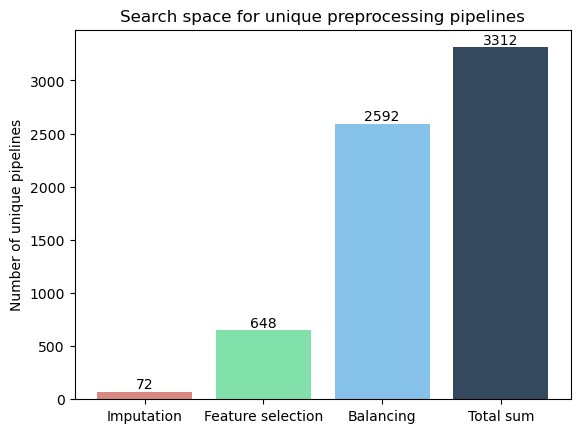

In [23]:
# The following figure displays the number of f1 scores and therefore the number of unique pipelines that is considered during the preprocessing.
import matplotlib.pyplot as plt
imputed = 4*2*9
feature = 9*4*2*9
balance = 9*4*2*9*4

# Data
categories = ['Imputation', 'Feature selection', 'Balancing', 'Total sum']
values = [imputed, feature, balance, imputed + feature + balance]

# Defining muted shades of red, green, and blue, and dark grey
red = '#d98880'
green = '#82e0aa'
blue = '#85c1e9'
dark_grey = '#34495e'

# Creating bar chart with muted colors
colors = [red, green, blue, dark_grey]
plt.bar(categories, values, color=colors)

# Adding exact values above each bar with a small offset
for i in range(len(categories)):
    plt.text(categories[i], values[i] + 1, str(values[i]), ha='center', va='bottom')

# Adding title and labels
plt.title('Search space for unique preprocessing pipelines')
plt.ylabel('Number of unique pipelines')

# Saving the plot as an image
plt.savefig('bar_chart.png')

# Showing the plot
plt.show()
